In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("diabetes_prediction_dataset.csv")
df = pd.DataFrame(data)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
enc = OneHotEncoder(sparse_output=False)
label_enc = LabelEncoder()
sex_enc = enc.fit_transform(np.array(df["gender"]).reshape(-1,1))
smoking_enc = label_enc.fit_transform(np.array(df["smoking_history"]).reshape(-1,1))
one_hot_df = pd.DataFrame(sex_enc,columns=['Female','Male','Other'])
label_enc_df = pd.DataFrame(smoking_enc, columns=["Smoking"])
df_new = pd.concat([df, one_hot_df, label_enc_df], axis=1)
df_new = df_new.drop(["gender","smoking_history"],axis=1)
df_new.head()

c:\Users\suvom\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,Smoking
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0,0.0,4
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0
2,28.0,0,0,27.32,5.7,158,0,0.0,1.0,0.0,4
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,1
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,1


<b>Feature selection techniques

<i>1.1. Correlation Analysis

In [5]:
rs = np.random.RandomState(0)
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=4)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,Smoking
age,1.0000,0.2512,0.2334,0.3374,0.1014,0.1107,0.2580,0.0305,-0.0303,-0.0073,0.2286
hypertension,0.2512,1.0000,0.1213,0.1477,0.0809,0.0844,0.1978,-0.0143,0.0144,-0.0038,0.0932
heart_disease,0.2334,0.1213,1.0000,0.0612,0.0676,0.0701,0.1717,-0.0778,0.0779,-0.0027,0.0276
bmi,0.3374,0.1477,0.0612,1.0000,0.0830,0.0913,0.2144,0.0230,-0.0230,0.0001,0.1794
HbA1c_level,0.1014,0.0809,0.0676,0.0830,1.0000,0.1667,0.4007,-0.0200,0.0201,-0.0015,0.0374
blood_glucose_level,0.1107,0.0844,0.0701,0.0913,0.1667,1.0000,0.4196,-0.0172,0.0172,0.0005,0.0402
diabetes,0.2580,0.1978,0.1717,0.2144,0.4007,0.4196,1.0000,-0.0376,0.0377,-0.0041,0.0943
Female,0.0305,-0.0143,-0.0778,0.0230,-0.0200,-0.0172,-0.0376,1.0000,-0.9996,-0.0159,0.0781
Male,-0.0303,0.0144,0.0779,-0.0230,0.0201,0.0172,0.0377,-0.9996,1.0000,-0.0113,-0.0783
Other,-0.0073,-0.0038,-0.0027,0.0001,-0.0015,0.0005,-0.0041,-0.0159,-0.0113,1.0000,0.0058


According to the correlation matrix, the important features are age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level. Hence, the sex and smoking patterns have no influence on the risk of diabetes.

<i>1.2. Recursive Feature Elimination (RFE)

In [6]:
X = df_new.drop("diabetes",axis=1,inplace=False)
y = df_new["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=3, importance_getter='auto')  
selector.fit(X_train, y_train)
print(f"Ranking: {selector.ranking_}")

Ranking: [2 4 5 1 1 1 7 6 8 3]


The three most important features are: bmi, HbA1c_level and blood_glucose_level. Features such as age, hypertension, heart_diseases and smoking are secondary and have lesser importance. However, the sex still does not have any influence on the risk of getting diabetes.

<i>1.3. Tree-based feature importance

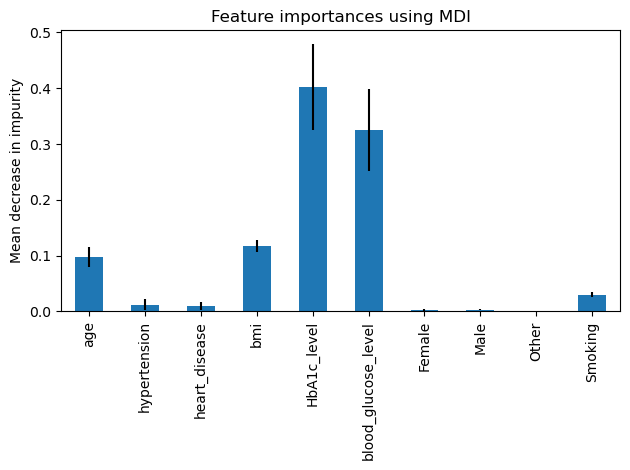

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The MDI confirms the results found previously. However, this classification gives slightly more importance to the age factor unlike the previous model.